In [1]:
import turtle
import numpy as np
import os
import time
import math
import sys
from math import pi
import subprocess
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import random
import matplotlib.pyplot as plt

In [2]:
sys.path.append('..')
from py_models.geo_math import *
from py_models.draw_tools import *
from py_models.euclidean_spanner import EuclideanSpanner
from py_models.pointset import Pointset

In [3]:
PI = np.pi
PAPER_T = (3+4*PI)/3

In [4]:
def draw_pathgreedy_from_pointset(pointset, t=PAPER_T, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    cmd = './printout_general_path_greedy_test ' + str(t) + ' < temp_file.in > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    print(output)
    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h, pointset=pointset)
    subprocess.check_call(['rm', 'temp_file.in'])
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [9]:
def write_tikz_pg_from_pointset(pointset, t=PAPER_T, scale=0.25, circle_size=0.25, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    cmd = './printout_general_path_greedy_test ' + str(t) + ' < temp_file.in > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    #print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    segments = get_segments_from_file('temp_file.out')
    points = pointset.points
    
    print('\\begin{tikzpicture}[scale=' + str(scale) + ']')
    
    for segment in segments:
        print(f'\\draw ({segment[0][0]}, {segment[0][1]}) -- ({segment[1][0]}, {segment[1][1]});')
    
    for point in points:
        print(f'\\fill[fill=black] ({point[0]}, {point[1]}) circle ({circle_size}cm);')
        
    print('\\end{tikzpicture}')
    
    ret = draw_line_segments(segments, img_w, img_h)
    return ret

In [34]:
def write_tikz_pg_from_random_nonplane(N=5, t=PAPER_T, iter_count=10000, scale=0.25, circle_size=0.25, img_w=300, img_h=300):
    cmd = './random_grid_nonplane ' + str(t) + ' ' + str(N) + ' ' + str(iter_count) 
    cmd += ' > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    #print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    segments = get_segments_from_file('temp_file.out')
    
    print('\\begin{tikzpicture}[scale=' + str(scale) + ']')
    
    points = []
    points_silly_hash = set()
    for segment in segments:
        for i in range(0, 2):            
            silly_hash0 = segment[i][0] * 10000000 + segment[i][1]
            if (silly_hash0 not in points_silly_hash):
                points.append([segment[i][0], segment[i][1]])
                points_silly_hash.add(silly_hash0)

        print(f'\\draw ({segment[0][0]}, {segment[0][1]}) -- ({segment[1][0]}, {segment[1][1]});')
    
    for point in points:
        print(f'\\fill[fill=black] ({point[0]}, {point[1]}) circle ({circle_size}cm);')
        
    print('\\end{tikzpicture}')
    
    ret = draw_line_segments(segments, img_w, img_h)
    return ret

N = 14
Planarity: NOT PLANAR
Max degree: 2
Stretch: 5.05151

\begin{tikzpicture}[scale=0.025]
\draw (0.0, 0.0) -- (49.9995, -86.6017);
\draw (0.0, 0.0) -- (-90.0, -0.009);
\draw (100.0, 0.0) -- (-49.9996, -86.6018);
\draw (100.0, 0.0) -- (190.0, -0.009);
\draw (49.9995, -86.6017) -- (0.0, 0.0);
\draw (49.9995, -86.6017) -- (139.999, -86.5926);
\draw (-49.9996, -86.6018) -- (100.0, 0.0);
\draw (-49.9996, -86.6018) -- (-129.999, -86.5938);
\draw (139.999, -86.5926) -- (49.9995, -86.6017);
\draw (139.999, -86.5926) -- (211.998, -86.5781);
\draw (211.998, -86.5781) -- (139.999, -86.5926);
\draw (211.998, -86.5781) -- (245.153, -72.5526);
\draw (190.0, -0.009) -- (100.0, 0.0);
\draw (190.0, -0.009) -- (250.184, -18.6328);
\draw (250.184, -18.6328) -- (190.0, -0.009);
\draw (250.184, -18.6328) -- (245.153, -72.5526);
\draw (245.153, -72.5526) -- (211.998, -86.5781);
\draw (245.153, -72.5526) -- (250.184, -18.6328);
\draw (-129.999, -86.5938) -- (-49.9996, -86.6018);
\draw (-129.999, -86.5938

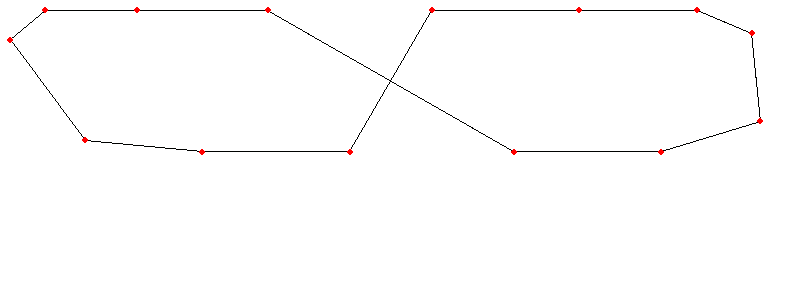

In [12]:
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')
write_tikz_pg_from_pointset(ps, scale=0.025, circle_size=2.5, img_w=800)

In [11]:
N = 200
rand_points = 20*np.random.rand(N, 2)

In [ ]:
ps = Pointset(points=rand_points)

In [ ]:
draw_pathgreedy_from_pointset(ps, t=1.5, img_w=600, img_h=600)

N = 14
Planarity: PLANAR
Max degree: 4
Stretch: 1.28559

\begin{tikzpicture}[scale=0.25]
\draw (0.0, 0.0) -- (100.0, 0.0);
\draw (0.0, 0.0) -- (49.9995, -86.6017);
\draw (0.0, 0.0) -- (-49.9996, -86.6018);
\draw (0.0, 0.0) -- (-90.0, -0.009);
\draw (100.0, 0.0) -- (0.0, 0.0);
\draw (100.0, 0.0) -- (49.9995, -86.6017);
\draw (100.0, 0.0) -- (139.999, -86.5926);
\draw (100.0, 0.0) -- (190.0, -0.009);
\draw (49.9995, -86.6017) -- (0.0, 0.0);
\draw (49.9995, -86.6017) -- (100.0, 0.0);
\draw (49.9995, -86.6017) -- (-49.9996, -86.6018);
\draw (49.9995, -86.6017) -- (139.999, -86.5926);
\draw (-49.9996, -86.6018) -- (0.0, 0.0);
\draw (-49.9996, -86.6018) -- (49.9995, -86.6017);
\draw (-49.9996, -86.6018) -- (-129.999, -86.5938);
\draw (-49.9996, -86.6018) -- (-90.0, -0.009);
\draw (139.999, -86.5926) -- (100.0, 0.0);
\draw (139.999, -86.5926) -- (49.9995, -86.6017);
\draw (139.999, -86.5926) -- (211.998, -86.5781);
\draw (139.999, -86.5926) -- (190.0, -0.009);
\draw (211.998, -86.5781) -- (13

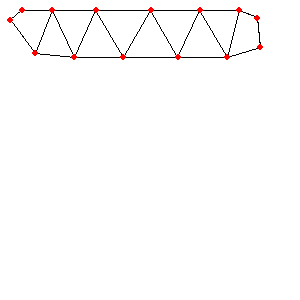

In [13]:
write_tikz_pg_from_pointset(ps, t=1.5)

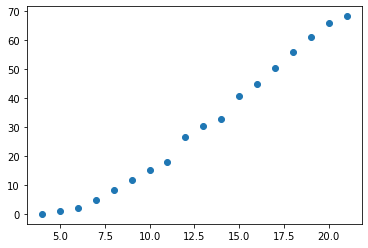

In [10]:
P = [[4,00.09],
[5,00.95],
[6,02.25],
[7,04.82],
[8,08.25],
[9,11.80],
[10,15.35],
[11,17.90],
[12,26.40],
[13,30.45],
[14,32.85],
[15,40.60],
[16,44.75],
[17,50.35],
[18,55.75],
[19,61.05],
[20,65.65],
[21,68.10]]
X = [p[0] for p in P]
Y = [p[1] for p in P]
plt.scatter(X, Y)
plt.show()

N = 49
Planarity: NOT PLANAR
Iterations taken: 2
t = 3; Stretch: 3

\begin{tikzpicture}[scale=0.8]
\draw (0.0, 0.0) -- (0.0, 1.0);
\draw (0.0, 1.0) -- (0.0, 0.0);
\draw (0.0, 1.0) -- (0.0, 2.0);
\draw (0.0, 1.0) -- (1.0, 1.0);
\draw (0.0, 2.0) -- (0.0, 1.0);
\draw (0.0, 2.0) -- (0.0, 3.0);
\draw (0.0, 2.0) -- (1.0, 2.0);
\draw (0.0, 3.0) -- (0.0, 2.0);
\draw (0.0, 3.0) -- (0.0, 4.0);
\draw (0.0, 4.0) -- (0.0, 3.0);
\draw (0.0, 4.0) -- (0.0, 5.0);
\draw (0.0, 4.0) -- (1.0, 4.0);
\draw (0.0, 5.0) -- (0.0, 4.0);
\draw (0.0, 5.0) -- (1.0, 5.0);
\draw (0.0, 6.0) -- (1.0, 6.0);
\draw (1.0, 0.0) -- (1.0, 1.0);
\draw (1.0, 0.0) -- (2.0, 0.0);
\draw (1.0, 1.0) -- (0.0, 1.0);
\draw (1.0, 1.0) -- (1.0, 0.0);
\draw (1.0, 1.0) -- (2.0, 2.0);
\draw (1.0, 2.0) -- (0.0, 2.0);
\draw (1.0, 2.0) -- (1.0, 3.0);
\draw (1.0, 2.0) -- (2.0, 1.0);
\draw (1.0, 3.0) -- (1.0, 2.0);
\draw (1.0, 3.0) -- (1.0, 4.0);
\draw (1.0, 3.0) -- (2.0, 3.0);
\draw (1.0, 4.0) -- (0.0, 4.0);
\draw (1.0, 4.0) -- (1.0, 3.0);
\draw

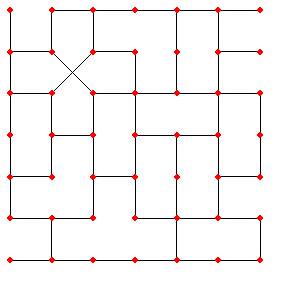

In [51]:
write_tikz_pg_from_random_nonplane(N=7, t=3, scale=0.8, circle_size=0.078125)